**Importing libraries**

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
#reading the txt file and creating a CSV out of it
ikea= pd.read_csv('ikea_kommun_data.txt', sep='\t', encoding='ISO8859')
ikea_pca = ikea.set_index(['Kommun_name'])
del ikea_pca["Kommun_code"] #deleting the Ko

In [65]:
ikea

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [68]:
#ikea.dtypes

In [67]:
#ikea.pop("Kommun_name")
#ikea.head()

Scaler is used to standardize features by removing the mean and scaling to unit variance, in order to fit into the data

In [38]:
scaler = StandardScaler()
ikea_pca_std= scaler.fit_transform(ikea_pca)

After applying scaling and mutating to array numpy format, the data is prepared for PCA and linear dimensionality reduction using singular value decomposition of the data to project it to a lower dimensional space, enabling us to explain more than 95% of the dataset with PCA and feature shrinkage

In [39]:
#PCA
pca=PCA()
pca.fit(ikea_pca_std)

PCA()

Based on the combined variance plot, now we move to feature selection through explained variance ratio, which shows percentage of variance explained by each of the selected 10 components

In [40]:
pca.explained_variance_ratio_

array([5.94227668e-01, 1.28923539e-01, 1.02373346e-01, 9.35074320e-02,
       7.30032728e-02, 5.98679313e-03, 1.50000612e-03, 4.77943007e-04,
       5.55723960e-20, 0.00000000e+00])

We can identify the components to be chosen from the graph below

As apparent from the graph, PCA has 5 components that can explain more than 95% of the variance in the dataset, so we can proceed with these with repetitive PCAs

Text(0, 0.5, 'Cumulative Explained Variance')

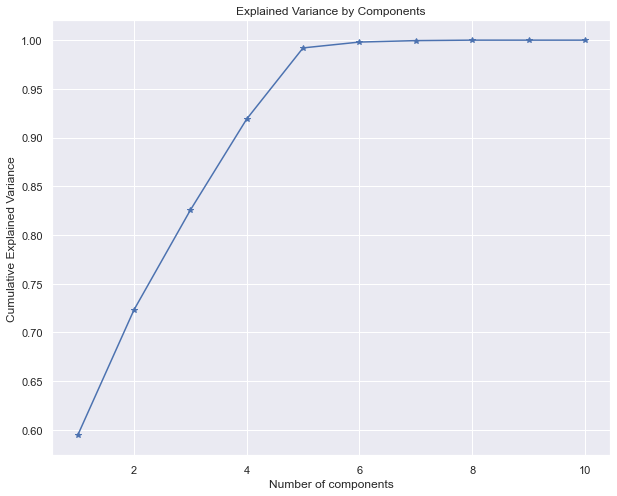

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [42]:
pca=PCA(n_components=5) #now we are also setting the components mannually

In [43]:
#Fitting for the model to have best suited individual parameters with high level accuracy
pca.fit(ikea_pca)

PCA(n_components=5)

Here for Kmeans, we need calculated transfored scores of the pca to work with.

In [44]:
#Using sklearn to project each row of the data into the vector space learned when fit was applied
#The number of columns will be equal to the value of n_components passed
pca.transform(ikea_pca)

array([[-2.47488659e+04,  1.21458778e+03,  1.04108842e+03,
         1.38134040e+02,  8.66156430e+01],
       [ 2.86008891e+04, -1.90210622e+03,  1.72998640e+03,
         8.21016380e+01, -2.33933880e+00],
       [ 5.20058638e+04, -2.16855812e+03,  1.53418687e+03,
         2.19173554e+02, -1.04814300e+01],
       ...,
       [ 1.01959153e+05, -6.39630328e+03,  1.29405860e+03,
        -8.32445488e+00, -1.51222530e+01],
       [-1.44453277e+04, -7.35430189e+01, -3.48310556e+02,
        -5.37662288e+00, -9.49000876e+00],
       [-2.35803193e+04,  1.05676341e+03,  1.82029060e+01,
        -8.57723965e+00,  9.15100280e+00]])

In [45]:
#for calculated transformed scores
scores_pca=pca.transform(ikea_pca)

**K-means**

Through sklearn.cluster library, kmeans_k is used to keep the first 15 Ks and through the plot, we can identify that the k=3 is the most suitable K.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the 
distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. The lower the inertia and Ks, the better.

In [46]:
kmeans_k=[]
for i in range(1,15):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++', random_state=35)
    kmeans_pca.fit(scores_pca)
    kmeans_k.append(kmeans_pca.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
kmeans_k

[966183407674.0492,
 266297005069.7101,
 99464857022.00348,
 50588024675.85051,
 26616710491.633564,
 16042655738.577005,
 11044280806.319805,
 6967280965.628631,
 4753750404.14943,
 3838771378.247716,
 3064225401.276108,
 2575923386.019853,
 2095007982.7352974,
 1913305228.3292882]

Text(0.5, 1.0, 'K-means with PCA clustering')

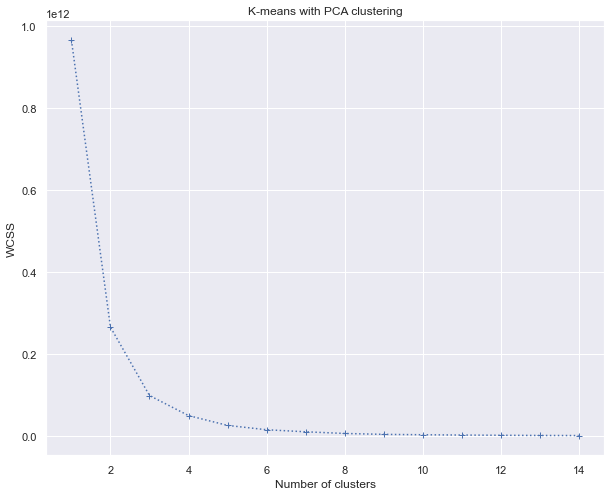

In [48]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), kmeans_k, marker="+", linestyle=":")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')

As shown from the graph, the elbow has just tilted from 3, hence choosing k=3

In [49]:
kmeans_pca=KMeans(n_clusters=3, init='k-means++', random_state=35)

In [50]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=35)

After adding the 5 components in the initial dataframe, appended additional column for attaching the cluster no.s in the data, in order to keep the data combined.

In [51]:
ikea_final=pd.concat([ikea_pca.reset_index(),pd.DataFrame(scores_pca)], axis=1)
ikea_final.columns.values[-5:]=['Component 1','Component 2','Component 3','Component 4','Component 5']
ikea_final['Cluster']=kmeans_pca.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


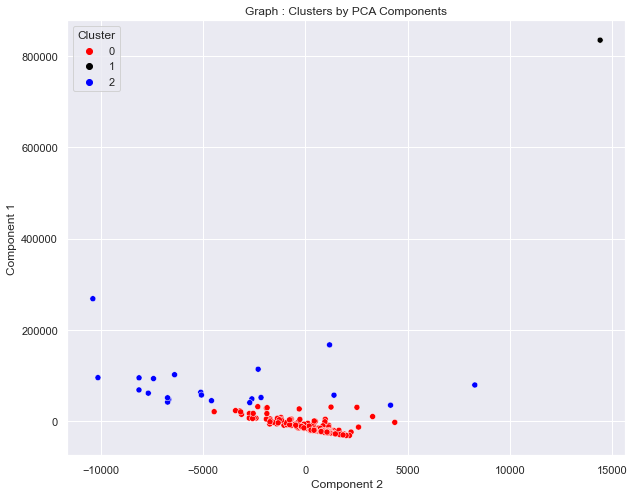

In [52]:
x_axis=ikea_final['Component 2']
y_axis=ikea_final['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=ikea_final['Cluster'], palette=['red','black','blue'])
plt.title('Graph : Clusters by PCA Components')
plt.show()

In [53]:
ikea_final['Cluster'].value_counts()

0    185
2     21
1      1
Name: Cluster, dtype: int64

Component 1 and 2 have been chosen as they have the abundance in data for explanation, with majority in cluster '0' with 185 kommuns and vice versa

**Kommuns suggestions**

By 2010, 19 kommuns had ikea present in them

Adding additional column showing Kommuns

1 = with ikea presence, 0 = wihtout ikea presence

A list containing the additional column and has been appended to the final dataset to dinstinguish and filter 

In [54]:
ikea_final=ikea_final.drop((["Component 1","Component 2","Component 3","Component 4","Component 5"]), axis=1)

In [55]:
available_ikea=[0]*207

In [56]:
has_ikea=['Haparanda','Karlstad','Örebro',
'Uppsala',
'Huddinge',
'Uddevalla',
'Mölndal',
'Linköping',
'Jönköping',
'Helsingborg',
'Kalmar',
'Älmhult',
'Malmö']

In [57]:
ikea_final['has_ikea']=available_ikea

In [58]:
ikea_final.loc[ikea_final['Kommun_name'].isin(has_ikea),'has_ikea']=1

The kommuns with the highest population and no IKEA presence are the most suitable for starting establishing a presence.

In [59]:
ikea_final[ikea_final["has_ikea"]==0].sort_values(by=['Population'], ascending=False).head(3)

,Kommun_name,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea
19,Stockholm,2010,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,1,0
53,Norrköping,2010,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,2,0
118,Lund,2010,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,2,0


As per the data provided the above cities have the highest population and don't have IKEA presence so they are the most suitable ones for starting IKEA presense.

Now can use conditioning using Kommun codes (near ones having the same first two digits) to avoid suggesting openining of IKEA in nearby locations

In [60]:
k= pd.read_csv('ikea_kommun_data.txt', sep='\t', encoding='ISO8859')

In [61]:
ikea_final['Kommun_code']=round(k["Kommun_code"]/100)

In [62]:
ikea_final[ikea_final["has_ikea"]==1].sort_values(by='Kommun_code')

,Kommun_name,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster,has_ikea,Kommun_code
9,Huddinge,2010,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,2,1,1.0
33,Uppsala,2010,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,2,1,4.0
52,Linköping,2010,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,2,1,6.0
64,Jönköping,2010,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,2,1,7.0
75,Älmhult,2010,847,853,15603,1511,0.096840,49.76318,87.273823,0,0,0,1,8.0
1,Kalmar,2010,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0,1,9.0
117,Malmö,2010,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,2,1,13.0
120,Helsingborg,2010,5528,3244,129177,16395,0.126919,85.40061,569.598220,1,0,2,1,13.0
165,Mölndal,2010,3512,1487,60973,9962,0.163384,118.36336,361.872096,0,0,0,1,15.0
168,Uddevalla,2010,2309,1010,51868,5727,0.110415,114.57143,237.916478,0,0,0,1,15.0


-----------